# Data Pre-Processing

## Import Data Exploration Tools

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

## Read In and Review the Data

In [2]:
df = pd.read_csv('cancer_reg_cleaned.csv', index_col=[0])

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TARGET_deathRate,2865.0,178.636195,27.454947,59.700000,161.300000,178.100000,195.200000,293.900000
incidenceRate,2865.0,447.642823,51.479125,201.300000,420.300000,453.549422,480.500000,651.300000
medIncome,2865.0,47002.527400,12068.484000,22640.000000,38750.000000,45132.000000,52476.000000,125635.000000
povertyPercent,2865.0,16.917173,6.435305,3.200000,12.200000,15.900000,20.500000,47.400000
MedianAge,2865.0,40.855428,5.180140,22.300000,37.700000,40.900000,43.900000,65.300000
MedianAgeMale,2865.0,39.596859,5.218851,22.400000,36.400000,39.600000,42.600000,64.700000
MedianAgeFemale,2865.0,42.186736,5.269493,22.300000,39.100000,42.400000,45.400000,65.700000
AvgHouseholdSize,2865.0,2.528604,0.244450,1.860000,2.380000,2.510000,2.630000,3.970000
PercentMarried,2865.0,51.788342,6.870009,23.100000,47.800000,52.400000,56.400000,72.500000
PctNoHS18_24,2865.0,18.250820,8.105485,0.000000,12.800000,17.200000,22.700000,62.700000


## Distribution of the Dependent Variable
We'll start again by looking at the distribution of our Target Variable highlighting some our more extreme values.

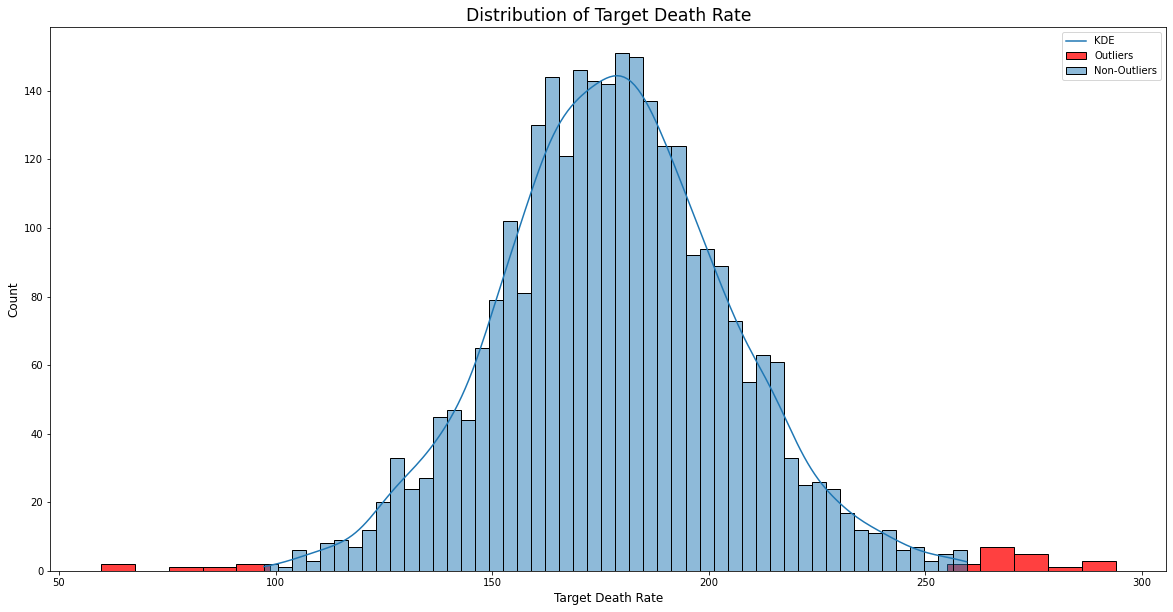

In [4]:
#look for values more than 3 standard deviations away from the mean.
mean = df['TARGET_deathRate'].mean()
std = np.std(df['TARGET_deathRate'])
upper_thresh = mean + (3 * std)
lower_thresh = mean - (3 * std)

outliers = df[(df['TARGET_deathRate'] < lower_thresh) | (df['TARGET_deathRate'] > upper_thresh)]
non_outliers = df[(df['TARGET_deathRate'] >= lower_thresh) & (df['TARGET_deathRate'] <= upper_thresh)]

plt.figure(figsize=(20,10))
sns.histplot(x='TARGET_deathRate', data=outliers, bins=30, color='r')
sns.histplot(x='TARGET_deathRate', data=non_outliers, bins=50, alpha=0.5, kde=True)
plt.title('Distribution of Target Death Rate', fontdict={'fontsize': 'xx-large'})
plt.xlabel('Target Death Rate',fontdict={'fontsize': 'large'})
plt.ylabel('Count',fontdict={'fontsize': 'large'})
plt.legend(['KDE', 'Outliers', 'Non-Outliers'])
plt.show()

### Data Correlations
There does not appear to be any extreme values that require further investigation.  Now let's take a look at how some of our variables are correlated with each other. 

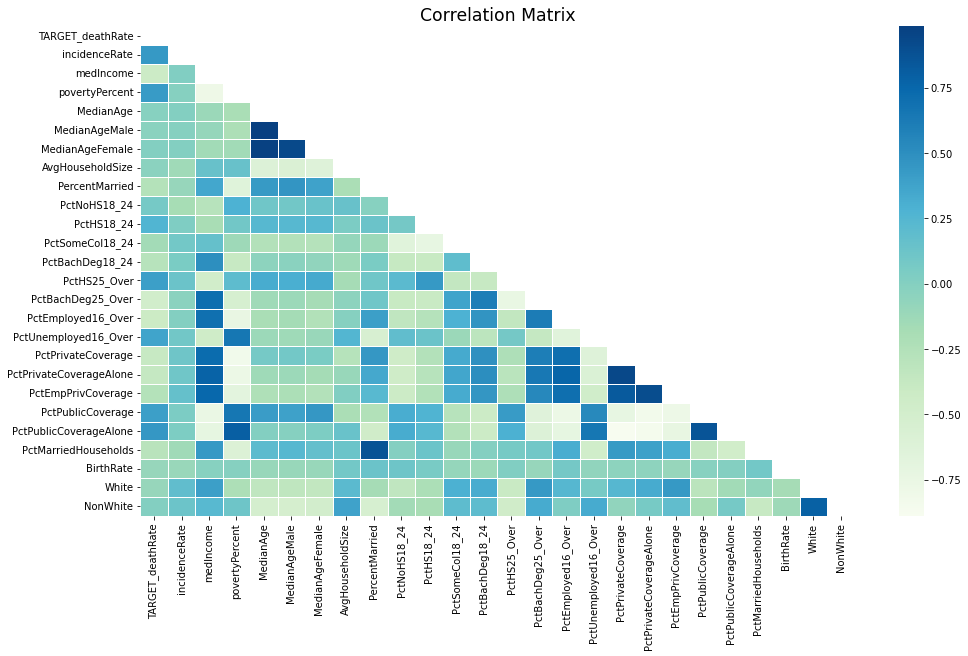

In [5]:
labels = df.columns
corr = pd.DataFrame(df.corr(), columns=labels, index=labels)
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(16,9))
sns.heatmap(corr, cmap='GnBu', linewidths=1, mask=mask)
plt.title('Correlation Matrix', size='xx-large')
plt.show()

### Correlation with Dependent Variable
You can see that other than obvious expected high correlations for complementary fields (i.e, `MedianAgeMale`, `MedianAgeFemale`), there does not seem to be a lot of really high correlations.  Let's take a closer look at the correlations between our dependent variable and each independent variable.

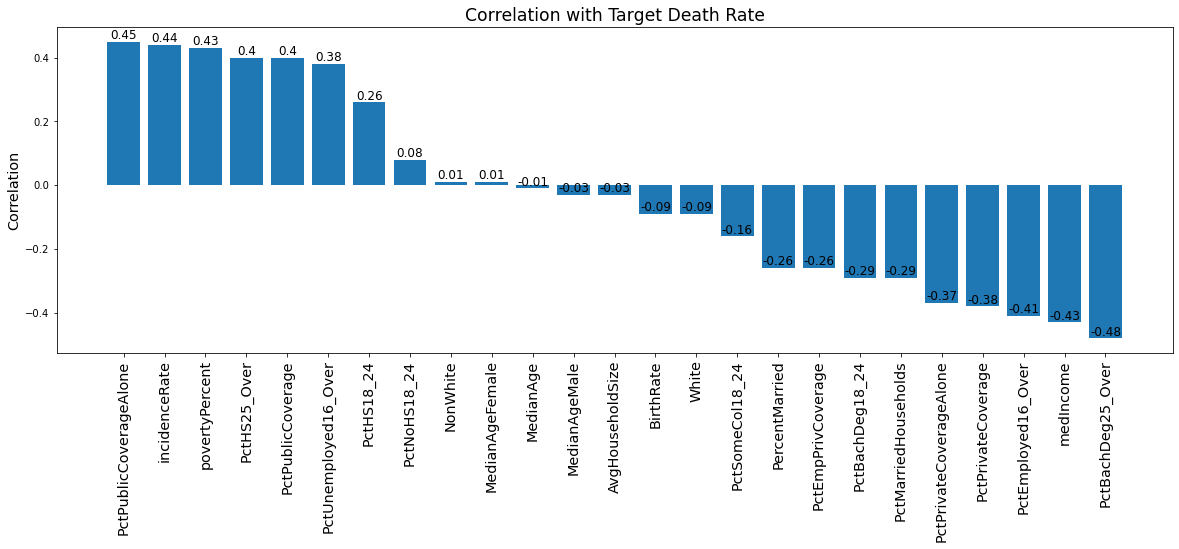

In [6]:
corr = round(df.corr()['TARGET_deathRate'].sort_values(ascending=False),2)
corr = corr.drop('TARGET_deathRate')
x = range(len(corr))
y = corr.values

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center', va = 'bottom', fontsize='large')

plt.figure(figsize=(20,6))
plt.bar(x, y, align='center')
addlabels(x, y)
plt.xticks(range(len(corr)), corr.index, rotation = 90, fontsize='x-large')
plt.title('Correlation with Target Death Rate', size='xx-large')
plt.ylabel('Correlation', size='x-large')

plt.show()

Interestingly enough the highest absolute correlations (positive or negative) are related to Insurance Coverage and Education.  I would have certainly suspected that the highest correlation would've been with Incidence Rate. It seems logical, that the higher the incidence rate the higher the death rate.  

Look in particular at the negative correlations.  The higher your income and the higher your education, the lower your death rate.  Let's take a closer look at some of these relationships.

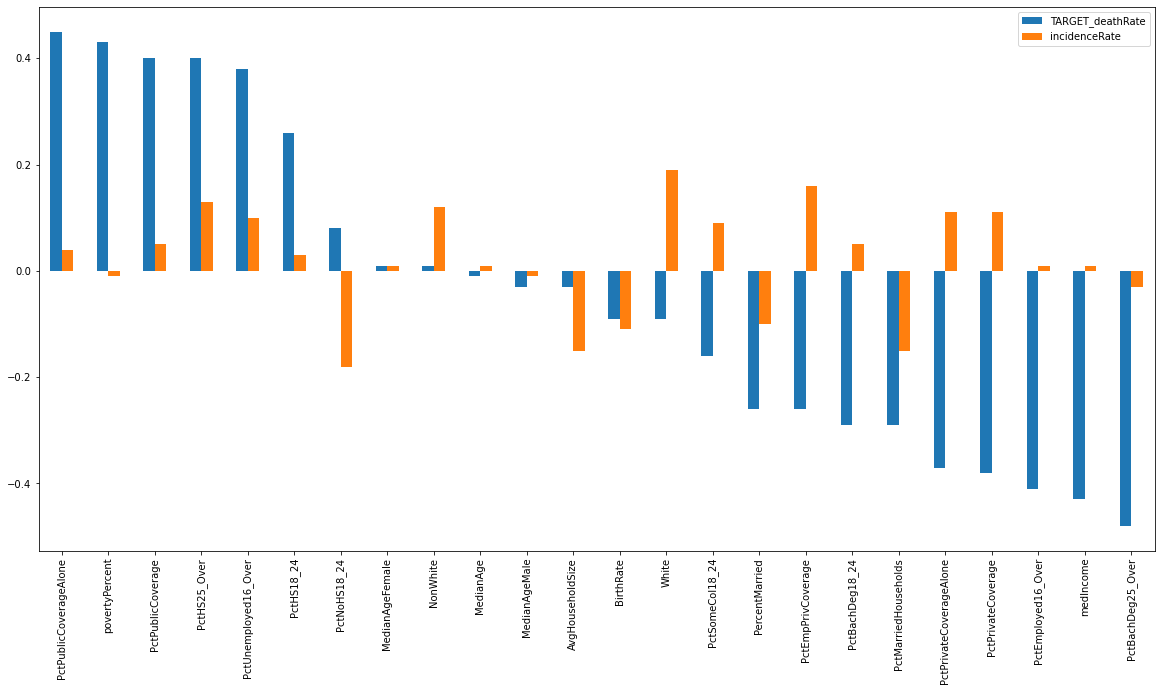

In [7]:
corr = round(df.corr()[['TARGET_deathRate', 'incidenceRate']],2).sort_values('TARGET_deathRate', ascending=False, axis=0)
corr = corr.drop(['TARGET_deathRate', 'incidenceRate'])
corr.plot.bar(figsize=(20,10))
plt.show()

This chart above confirms our suspicion that was indicated by our correlation data. The higher your Median Income the lower your death rate is even though the incidence rate is relatively constant.  There can be several reasons why this is the case, which is beyond the scope of this analysis.

### Correlations among Independent Variables
An important assumption for any linear regression is that there is no multicollinearity among the independent variables.  I want to take a specific look at any independent variables that may be highly correlated with one another. 

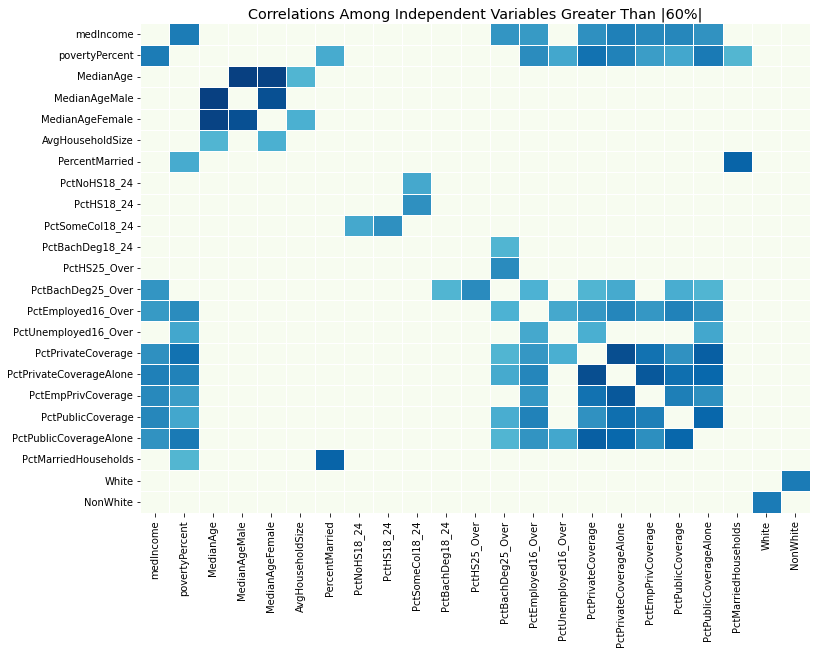

In [8]:
labels = df.columns
corr = pd.DataFrame(np.abs(df.corr()), columns=labels, index=labels)
corr = corr.where(corr > 0.6, 0)
corr = corr.where(corr != 1, 0)
corr = corr.loc[(corr != 0).any(axis=1)]
corr = corr.loc[:, (corr != 0).any(axis=0)]

plt.figure(figsize=(12,9))
sns.heatmap(corr, cmap='GnBu', linewidths=1, cbar=False)
plt.title('Correlations Among Independent Variables Greater Than |60%|', size='x-large')
plt.show()

As we would expect, all of our complementary independent variables are highly correlated.  For example, `White` and `NonWhite` are very highly correlated (which is to be expected).  We can also see things like income, employment education, and types of coverage are also highly correlated.  The relationships between these variables all seem to make sense to me.  

It is good to note at this time that so much of our data is highly correlated.  When we perform our linear regression, we have to understand that having independent variables will not reduce the predictive ability of our algorithm, but it will diminish the ability to interpret our coeffecients.